In [2]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Dirs
samples_cell_dir = "/usr/src/samples_cell/"
samples_substrate_dir = "/usr/src/samples_substrate/"

In [4]:
# create big substrate

for i in range(4):
    file = samples_substrate_dir + os.listdir(samples_substrate_dir)[i]
    image = cv.imread(file)
    image = cv.cvtColor(image, cv.COLOR_BGR2BGRA)
    if i == 0:
        half1 = np.copy(image)
    elif i == 1:
        half1 = np.concatenate((half1, image))
    elif i == 2:
        half2 = np.copy(image)
    else:
        half2 = np.concatenate((half2, image))

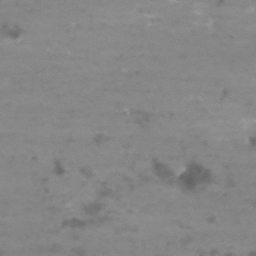

In [19]:
substrate = Image.open(samples_substrate_dir + "sample_0.png")
substrate.show()

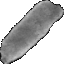

In [20]:
cell = cv.imread(samples_cell_dir + "sample_2.png")
cell = cv.cvtColor(cell, cv.COLOR_BGR2BGRA)

thresh = 5
alpha = np.all(cell[:, :, :3] > thresh, axis=2).astype(np.uint8) * 255
cell[:, :, 3] = alpha
cell = Image.fromarray(cell, "RGBA")
cell.show()

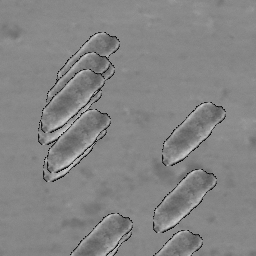

In [32]:
x_coord = np.random.randint(10, 240)
y_coord = np.random.randint(10, 240)

substrate.paste(cell, (x_coord, y_coord), cell)
substrate.show()

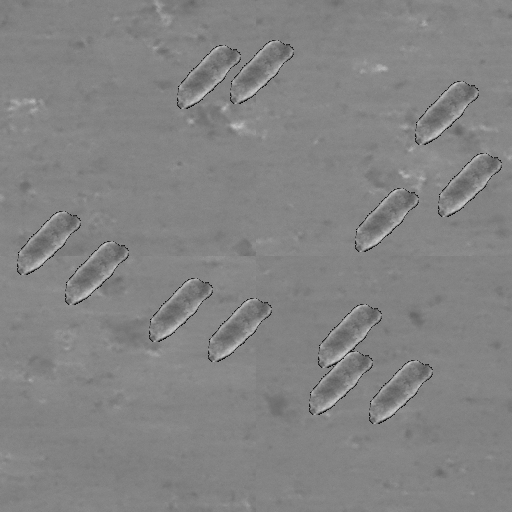

In [63]:
big_substrate = np.concatenate((half1, half2), axis=1)
big_substrate = Image.fromarray(big_substrate)

count_cells = np.random.randint(3, 20)

for i in range(count_cells):
    cell = cv.imread(samples_cell_dir + f'sample_{2}.png')
    cell = cv.cvtColor(cell, cv.COLOR_BGR2BGRA)

    thresh = 10
    alpha = np.all(cell[:, :, :3] > thresh, axis=2).astype(np.uint8) * 255
    cell[:, :, 3] = alpha
    cell = Image.fromarray(cell, 'RGBA')

    x_coord_big = np.random.randint(10, 500)
    y_coord_big = np.random.randint(10, 500)

    big_substrate.paste(cell, (x_coord_big, y_coord_big), cell)
big_substrate.show()